# **Q3. Linear Regression**

In [0]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **Reading Data from CSV**

Pandas is the most popular python library that is used for data analysis. It provides highly optimized performance with back-end source code is purely written in C or Python.



In [0]:
import pandas as pd
ds1=pd.read_csv("/content/drive/My Drive/Datasets/Question-3/airfoil.csv",header=None)
print(ds1)

           0     1       2     3         4        5
0     8000.0   4.0  0.2286  39.6  0.004738  113.129
1     6300.0   0.0  0.0508  55.5  0.000762  132.796
2      400.0   4.0  0.2286  55.5  0.004286  123.274
3     1250.0  15.4  0.0508  39.6  0.028259  126.743
4      800.0   7.3  0.2286  39.6  0.012348  126.299
...      ...   ...     ...   ...       ...      ...
1197  3150.0   5.4  0.1524  31.7  0.005255  118.291
1198  2500.0  19.7  0.0508  39.6  0.036484  116.184
1199   800.0   2.0  0.2286  55.5  0.003135  128.492
1200  3150.0   3.3  0.1016  71.3  0.002028  132.114
1201   630.0   4.0  0.3048  39.6  0.005796  131.073

[1202 rows x 6 columns]


## **Converting to numpy**

Numpy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.
Besides its obvious scientific uses, Numpy can also be used as an efficient multi-dimensional container of generic data

In [0]:
import numpy as np
train_num=ds1.iloc[:,:5].to_numpy() 
train_labeling=ds1.iloc[:,5:6].to_numpy()
train_num

array([[8.00000e+03, 4.00000e+00, 2.28600e-01, 3.96000e+01, 4.73801e-03],
       [6.30000e+03, 0.00000e+00, 5.08000e-02, 5.55000e+01, 7.61930e-04],
       [4.00000e+02, 4.00000e+00, 2.28600e-01, 5.55000e+01, 4.28620e-03],
       ...,
       [8.00000e+02, 2.00000e+00, 2.28600e-01, 5.55000e+01, 3.13525e-03],
       [3.15000e+03, 3.30000e+00, 1.01600e-01, 7.13000e+01, 2.02822e-03],
       [6.30000e+02, 4.00000e+00, 3.04800e-01, 3.96000e+01, 5.79636e-03]])

## **Feature Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

**MinMaxScaler:-**
Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set.


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_num)

# print(scaler.data_max_)

train_num=scaler.transform(train_num)
print(" After scaling:\n\n\n",train_num)


 After scaling:


 [[0.39393939 0.18018018 0.72727273 0.19949495 0.07476783]
 [0.30808081 0.         0.09090909 0.6010101  0.00622727]
 [0.01010101 0.18018018 0.72727273 0.6010101  0.06697943]
 ...
 [0.03030303 0.09009009 0.72727273 0.6010101  0.04713909]
 [0.1489899  0.14864865 0.27272727 1.         0.02805586]
 [0.02171717 0.18018018 1.         0.19949495 0.0930119 ]]


## **Appending ones**
Since we are trying to fit the hyper-plane to represent our data. And to represent a hyperplane we have to append a columns having all one's

In [0]:
ds=pd.DataFrame(np.ones((ds1.shape[0],), dtype=int))
n=ds.to_numpy()
print(np.append(n, train_num, axis=1))
train_num=np.append(n, train_num, axis=1)

[[1.         0.39393939 0.18018018 0.72727273 0.19949495 0.07476783]
 [1.         0.30808081 0.         0.09090909 0.6010101  0.00622727]
 [1.         0.01010101 0.18018018 0.72727273 0.6010101  0.06697943]
 ...
 [1.         0.03030303 0.09009009 0.72727273 0.6010101  0.04713909]
 [1.         0.1489899  0.14864865 0.27272727 1.         0.02805586]
 [1.         0.02171717 0.18018018 1.         0.19949495 0.0930119 ]]


In [0]:
train_data=train_num[:900,:]
train_labels=train_labeling[:900]

test_data=train_num[900:,:]
test_labels=train_labeling[900:]
test_labels.shape


(302, 1)

# **Linear Regression**

**Cost Function:-**

We need to minimize the cost function:

$ J(θ_1,θ_2)=(1/2m) ∑(h_0 x(i)−y(i))^2 $

Now we calculate the derivatives and have:

$ \frac{∂} {∂θ} J(θ_0,θ_1)=(1/m) ∑(h_θ(x(i))−y(i)) $ 

New theta will be:

$ θ_i = θ_i − α \frac{∂} {∂θ_i} J(θ_0,θ_1) $

**Mean squared error:**

It is simply the average of the square of the difference between the original values and the predicted values.


MSE:-  23.097485317617917
r^2:-  0.5094083831544804


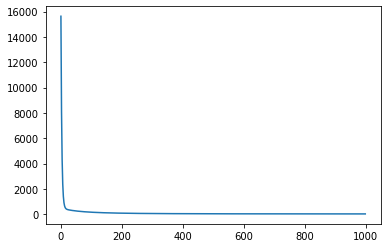

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

theta=np.random.randn(6,1)

cost_array=[]
itr_array=[]

m=len(train_labels[:])


for i in range(1000):
    
  h=np.dot(train_data,theta)

  theta=theta-(1/m)*0.1*(train_data.T.dot((h-train_labels)))

  cost=mean_squared_error(h,train_labels)
  cost_array.append(cost)
  itr_array.append(i)

# print(test_data.shape, theta.shape)

h=np.dot(test_data,theta)

# print(h.shape,test_labels.shape)

print("MSE:- ",mean_squared_error(h,test_labels))
print("r^2:- ",r2_score(test_labels,h))

fig, ax = plt.subplots()
ax.plot(itr_array, cost_array)
plt.show()


# for i in range(h.shape[0]):
#   print(abs(h[i]-train_labels[i]))  


**2.Using appropriate plot show how number of iterations is affecting the mean squared error for above model under below given conditions:**

(a)Using 3 different initial regression coefficients (weights) for fixed value of learning parameter (All 3 in single plot).

Theta-1-->  [[ 2.75478577]
 [-0.13874402]
 [-2.60839102]
 [ 0.70390897]
 [-0.76455575]
 [ 0.65474984]]
Theta-2-->  [[ 0.48367133]
 [-0.74427737]
 [ 0.23695797]
 [ 0.90869755]
 [ 0.32588824]
 [ 0.9362601 ]]
Theta-3-->  [[-0.20094559]
 [ 0.10841827]
 [-1.96307877]
 [ 0.33938658]
 [-1.01339829]
 [ 0.74296732]]


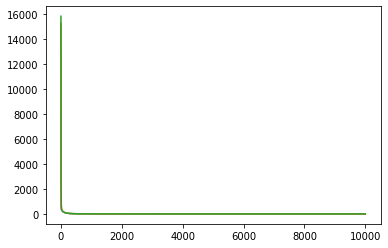

In [0]:
all_theta=[]
all_cost=[]
alpha=0.1
for itr in range(3):

  theta=np.random.randn(6,1)

  all_theta.append(theta)
  cost_array=[]
  itr_array=[]

  m=len(train_labels[:])

  for i in range(10000):
      
    h=np.dot(train_data,theta)

    theta=theta-(1/m)*alpha*(train_data.T.dot((h-train_labels)))

    cost=mean_squared_error(h,train_labels)
    cost_array.append(cost)
    itr_array.append(i)

  all_cost.append(cost_array)  

print("Theta-1--> ", all_theta[0])
print("Theta-2--> ", all_theta[1])
print("Theta-3--> ", all_theta[2])

plt.plot( itr_array, all_cost[0] )
plt.plot( itr_array, all_cost[1] )
plt.plot( itr_array, all_cost[2] )
# plt.legend(['', '', ''], loc='upper left')

plt.show()

(b)Using 3 different learning parameters for some fixed initial regression coefficients. (All 3 in single plot)

learning rate1 (L1)-->  1.0
learning rate1 (L2)-->  0.1
learning rate1 (L3)-->  0.01
Fixed theta-->  [[-0.40951493]
 [ 0.95010389]
 [-1.2436912 ]
 [-0.9923755 ]
 [ 1.13532255]
 [ 0.2091495 ]]


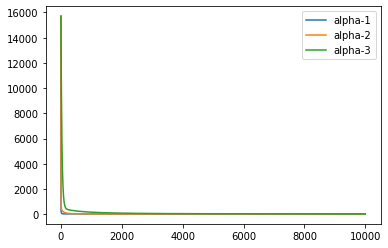

In [0]:
theta_fix=np.random.randn(6,1)
alpha=[1.0, 0.1, 0.01]

all_cost= []

for itr in range(3):

  theta=theta_fix
  cost_array=[]
  itr_array=[]

  m=len(train_labels[:])

  for i in range(10000):
      
    h=np.dot(train_data,theta)

    theta=theta-(1/m)*alpha[itr]*(train_data.T.dot((h-train_labels)))

    cost=mean_squared_error(h,train_labels)
    cost_array.append(cost)
    itr_array.append(i)

  all_cost.append(cost_array)  

print("learning rate1 (L1)--> ", alpha[0])
print("learning rate1 (L2)--> ", alpha[1])
print("learning rate1 (L3)--> ", alpha[2])

print("Fixed theta--> ",theta_fix)

plt.plot( itr_array, all_cost[0] )
plt.plot( itr_array, all_cost[1] )
plt.plot( itr_array, all_cost[2] )
plt.legend(['alpha-1', 'alpha-2', 'alpha-3'], loc='upper right')

plt.show()

If you want to apply regression on some dataset but one of it’s features has missing values under below given conditions, how will you approach the problem. (No need of Code Experimentation)

**(a) When 0-0.5% of values are missing of that feature.**

We can fill all missing values with appropriate way. Since 99.5% data is avilable we can use it to predict the best possible value of that missing cell. 

Guessing: Guess the missing value from 99.5% data which is avialble.

Average: Fill the missing value with average

**2) When 8-10% of values are missing of that feature:**

(a)Average:Take average if its a numerical data or else take mode if it is a categoriacal data

(b)Regression Substitution: You can use multiple-regression analysis to estimate a missing value.Regression substitution predicts the missing value from the other values

(c)Deletion:That row can be dropped

**3) When 60-70% of values are missing of that feature**

(a)Deletion: That whole column can be dropped
